# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
print(df.head(5))

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         45.0                198.0            1.0   

   AccountBalance      TransactionDate TransactionType   Location Channel  \
0         5112.21  2023-04-11 16:29:14           Debit  San Diego     ATM   
1        13758.91  2023-06-27 16:44:19           Debit    Houston     ATM   
2         1122.35  2023-07-10 18:16:08           Debit       Mesa  Online   
3         8569.06  2023-05-05 16:32:11           Debit    Raleigh  Online   
4         7429.40  2023-10-16 17:51:24          Credit    Atlanta  Online   

  CustomerOccupation PreviousTransactionDate  Target  
0             Doctor     2024-11-04 08:08:0

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
print(df.columns)

# Pilih fitur (drop kolom datetime & Target)
X = df.drop(columns=["TransactionDate", "PreviousTransactionDate", "Target"])
y = df["Target"]

# Encode kolom kategorikal
cat_cols = X.select_dtypes(include=["object"]).columns
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le  # simpan encoder untuk inverse transform kalau dibutuhkan

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)
print("Distribusi label train:\n", y_train.value_counts())
print("Distribusi label test:\n", y_test.value_counts())

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionDate', 'TransactionType',
       'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate',
       'Target'],
      dtype='object')
Ukuran data latih: (2029, 9)
Ukuran data uji: (508, 9)
Distribusi label train:
 Target
1    681
0    677
2    671
Name: count, dtype: int64
Distribusi label test:
 Target
1    171
0    169
2    168
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [5]:
# Buatlah model klasifikasi menggunakan Decision Tree
# Membangun Model Klasifikasi - Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

print('Model Decision Tree telah dilatih')

Model Decision Tree telah dilatih


=== Evaluasi Decision Tree ===
Akurasi: 0.3720472440944882

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0     0.3466    0.3609    0.3536       169
           1     0.3758    0.3626    0.3690       171
           2     0.3952    0.3929    0.3940       168

    accuracy                         0.3720       508
   macro avg     0.3725    0.3721    0.3722       508
weighted avg     0.3725    0.3720    0.3722       508



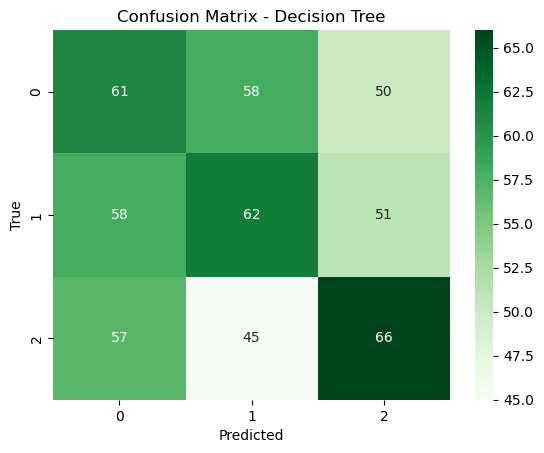

In [6]:
y_pred_dt = model_dt.predict(X_test)

print("=== Evaluasi Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt, digits=4))

# Visualisasi Confusion Matrix untuk Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
# Menyimpan Model
import joblib
joblib.dump(model_dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [8]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
# Disini saya menggunakan Model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

print('Model Random Forest telah dilatih')

Model Random Forest telah dilatih



=== Evaluasi Random Forest ===
Akurasi: 0.36220472440944884

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0     0.3514    0.3846    0.3672       169
           1     0.3333    0.3743    0.3526       171
           2     0.4198    0.3274    0.3679       168

    accuracy                         0.3622       508
   macro avg     0.3682    0.3621    0.3626       508
weighted avg     0.3679    0.3622    0.3625       508



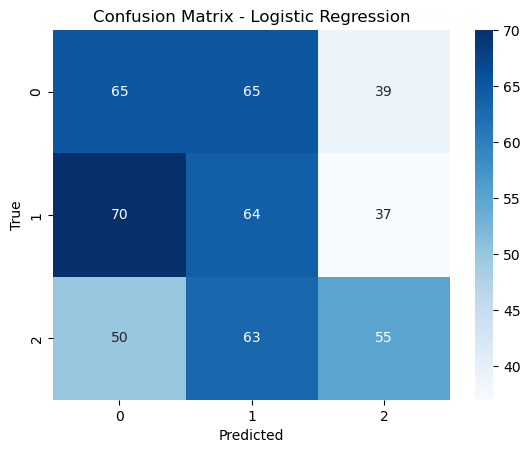

In [9]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
y_pred_rf = model_rf.predict(X_test)

print("\n=== Evaluasi Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=4))

# Visualisasi Confusion Matrix untuk Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [10]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
import joblib
joblib.dump(model_rf, 'explore_random_forest_classification.h5')

['explore_random_forest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
# Definisikan parameter grid untuk Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],      # jumlah pohon
    "max_depth": [None, 10, 20, 30],      # kedalaman pohon
    "min_samples_split": [2, 5, 10],      # minimal sample untuk split
    "min_samples_leaf": [1, 2, 4],        # minimal sample di leaf
    "bootstrap": [True, False]            # sampling dengan/ tanpa replacement
}

# Model dasar
rf = RandomForestClassifier(random_state=42)

# GridSearch dengan 5-fold cross validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring="f1_weighted"
)

# Latih model dengan data latih
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.3415023141922619


In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
# Latih ulang dengan model terbaik di seluruh data latih
best_rf.fit(X_train, y_train)

# Evaluasi di data uji
y_pred_best = best_rf.predict(X_test)

print("\n=== Evaluasi Random Forest (Best Model) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, digits=4))


=== Evaluasi Random Forest (Best Model) ===
Akurasi: 0.3425196850393701

Classification Report:
              precision    recall  f1-score   support

           0     0.3410    0.3491    0.3450       169
           1     0.3387    0.3684    0.3529       171
           2     0.3490    0.3095    0.3281       168

    accuracy                         0.3425       508
   macro avg     0.3429    0.3424    0.3420       508
weighted avg     0.3429    0.3425    0.3421       508



In [13]:
# Menyimpan Model hasil tuning
import joblib
joblib.dump(best_rf, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code